In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.1 MB/s eta 0:00:00


In [6]:
%cd /content/drive/MyDrive/yolov8


/content/drive/MyDrive/yolov8


In [8]:
!cat /content/drive/MyDrive/yolov8/data.yaml


names:
- Fire
- default
- smoke

nc: 3

path: /content/drive/MyDrive/yolov8

train: train/images
val: valid/images
test: test/images


In [9]:
!ls /content/drive/MyDrive/yolov8/train/images | head


fire1_mp4-24_jpg.rf.b4cf490293c3b92c613200d6b1a8855c.jpg
fire1_mp4-25_jpg.rf.5d16eb7bdaadcda6b91a6ae14843d08e.jpg
fire1_mp4-27_jpg.rf.8a1216993b334133d27fa6feca3bfccd.jpg
fire1_mp4-28_jpg.rf.869cbd7bffbc074424cfee9c8dc71938.jpg
fire1_mp4-31_jpg.rf.430ff927cfb9a58a0869ec9afe4c3d91.jpg
fire1_mp4-32_jpg.rf.d715d99ebda7bedcdbd16790a13e5874.jpg
fire1_mp4-33_jpg.rf.90e9c465435ac1cac4c6a0c5ad11d18a.jpg
fire2_mp4-28_jpg.rf.27cad783f34b8f9f162d91a0c5776350.jpg
fire2_mp4-30_jpg.rf.9cdc1ddb2168f71ca95b435bf5f87732.jpg
fire2_mp4-31_jpg.rf.ab47260596246c118086a71f6d502de6.jpg


In [10]:
!ls /content/drive/MyDrive/yolov8/train/labels | head


fire1_mp4-24_jpg.rf.b4cf490293c3b92c613200d6b1a8855c.txt
fire1_mp4-25_jpg.rf.5d16eb7bdaadcda6b91a6ae14843d08e.txt
fire1_mp4-27_jpg.rf.8a1216993b334133d27fa6feca3bfccd.txt
fire1_mp4-28_jpg.rf.869cbd7bffbc074424cfee9c8dc71938.txt
fire1_mp4-31_jpg.rf.430ff927cfb9a58a0869ec9afe4c3d91.txt
fire1_mp4-32_jpg.rf.d715d99ebda7bedcdbd16790a13e5874.txt
fire1_mp4-33_jpg.rf.90e9c465435ac1cac4c6a0c5ad11d18a.txt
fire2_mp4-28_jpg.rf.27cad783f34b8f9f162d91a0c5776350.txt
fire2_mp4-30_jpg.rf.9cdc1ddb2168f71ca95b435bf5f87732.txt
fire2_mp4-31_jpg.rf.ab47260596246c118086a71f6d502de6.txt


In [12]:
!yolo task=detect mode=check data=/content/drive/MyDrive/yolov8/data.yaml


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 918, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=check'. Valid modes are ['train', 'predict', 'export', 'benchmark', 'val', 'track'].

    Arguments received: ['yolo', 'task=detect', 'mode=check', 'data=/content/drive/MyDrive/yolov8/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['obb

In [13]:
!yolo task=detect mode=train \
model=yolov8n.pt \
data=/content/drive/MyDrive/yolov8/data.yaml \
epochs=40 \
imgsz=640 \
batch=16

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

In [14]:
!yolo predict \
model=/content/drive/MyDrive/yolov8/runs/detect/train/weights/best.pt \
source=/content/drive/MyDrive/yolov8/test/images \
imgsz=640 \
conf=0.25


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/55 /content/drive/MyDrive/yolov8/test/images/fire1_mp4-26_jpg.rf.5a09c11c9facf23a9413ca63bc2a6085.jpg: 640x640 1 Fire, 7.3ms
image 2/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-29_jpg.rf.42a82dddeb68db98ca428fdf902c9e66.jpg: 640x640 1 Fire, 7.3ms
image 3/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-37_jpg.rf.742a554b0f0772dc0fb772be8648477c.jpg: 640x640 1 Fire, 7.3ms
image 4/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-50_jpg.rf.07b08a19a25759f464ebccd1158f1d23.jpg: 640x640 1 Fire, 7.3ms
image 5/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-51_jpg.rf.09ddf16d6c4c8117c7a4a5f26f796a44.jpg: 640x640 1 Fire, 7.3ms
image 6/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-56_jpg.rf.1e9523e7b497838a4e40d80da90084d6.jpg: 640x640 2 Fires, 7.3ms
image 7/55 /content/drive/MyDrive/yolo

In [16]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/yolov8/best.pt


In [17]:
!yolo predict \
model=/content/drive/MyDrive/yolov8/best.pt \
source=/content/drive/MyDrive/yolov8/test/images \
imgsz=640 \
conf=0.25


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/55 /content/drive/MyDrive/yolov8/test/images/fire1_mp4-26_jpg.rf.5a09c11c9facf23a9413ca63bc2a6085.jpg: 640x640 1 Fire, 8.2ms
image 2/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-29_jpg.rf.42a82dddeb68db98ca428fdf902c9e66.jpg: 640x640 1 Fire, 6.5ms
image 3/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-37_jpg.rf.742a554b0f0772dc0fb772be8648477c.jpg: 640x640 1 Fire, 6.3ms
image 4/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-50_jpg.rf.07b08a19a25759f464ebccd1158f1d23.jpg: 640x640 1 Fire, 6.5ms
image 5/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-51_jpg.rf.09ddf16d6c4c8117c7a4a5f26f796a44.jpg: 640x640 1 Fire, 6.8ms
image 6/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-56_jpg.rf.1e9523e7b497838a4e40d80da90084d6.jpg: 640x640 2 Fires, 6.8ms
image 7/55 /content/drive/MyDrive/yolo

In [18]:
!yolo val \
model=/content/drive/MyDrive/yolov8/best.pt \
data=/content/drive/MyDrive/yolov8/data.yaml \
imgsz=640


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 20.0±3.0 MB/s, size: 33.8 KB)
val: Scanning /content/drive/MyDrive/yolov8/valid/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 47/47 7.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.3it/s 2.4s
                   all         47         48      0.886      0.818      0.877      0.506
                  Fire         17         18        0.9      0.722      0.822      0.441
                 smoke         30         30      0.873      0.913      0.933      0.571
Speed: 14.7ms preprocess, 12.9ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [20]:
!yolo export model=/content/drive/MyDrive/yolov8/best.pt format=onnx


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/yolov8/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 12 packages in 134ms
Prepared 4 packages in 1.56s
Installed 4 packages in 245ms
 + colorama==0.4.6
 + onnx==1.20.1
 + onnxruntime==1.24.1
 + onnxslim==0.1.84

requirements: AutoUpdate success ✅ 2.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.1 opset 22...
/usr/local/lib/python3.12/

In [22]:
!yolo predict task=detect model=/content/drive/MyDrive/yolov8/best.onnx source=/content/drive/MyDrive/yolov8/test/images imgsz=640


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Loading /content/drive/MyDrive/yolov8/best.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.24.1 with CUDAExecutionProvider
2026-02-10 19:02:52.024869170 [W:onnxruntime:, transformer_memcpy.cc:111 ApplyImpl] 8 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.

image 1/55 /content/drive/MyDrive/yolov8/test/images/fire1_mp4-26_jpg.rf.5a09c11c9facf23a9413ca63bc2a6085.jpg: 640x640 1 Fire, 11.2ms
image 2/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-29_jpg.rf.42a82dddeb68db98ca428fdf902c9e66.jpg: 640x640 1 Fire, 10.3ms
image 3/55 /content/drive/MyDrive/yolov8/test/images/fire2_mp4-37_jpg.rf.742a554b0f0772dc0fb772be8648477c.jpg: 640x640 1 Fire, 10.1ms
image 4/55 /content/drive/MyDrive/yolov8/test/images/fir

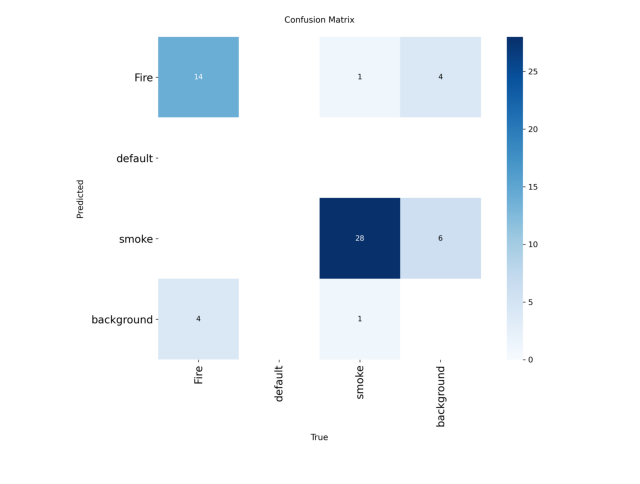

In [23]:
from matplotlib import pyplot as plt
import cv2

cm_path = "/content/drive/MyDrive/yolov8/runs/detect/val/confusion_matrix.png"
cm_img = cv2.imread(cm_path)
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(cm_img)
plt.axis("off")
plt.show()


In [29]:
from ultralytics import YOLO

# Load your exported ONNX model
model = YOLO("/content/drive/MyDrive/yolov8/best.onnx")

# Validate on your dataset
metrics = model.val(data="/content/drive/MyDrive/yolov8/data.yaml", imgsz=640, task='detect')

# Use mean_results() to get overall metrics
results = metrics.mean_results()  # returns a dict

# mean_results() returns [precision, recall, mAP50, mAP50-95]
precision, recall, mAP50, mAP50_95 = results

print("Overall Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("mAP50:", mAP50)
print("mAP50-95:", mAP50_95)



WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Loading /content/drive/MyDrive/yolov8/best.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.24.1 with CUDAExecutionProvider
Setting batch=1 input of shape (1, 3, 640, 640)
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 18.2±5.3 MB/s, size: 34.4 KB)
val: Scanning /content/drive/MyDrive/yolov8/valid/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 47/47 16.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 47/47 48.5it/s 1.0s
                   all         47         48      0.941      0.891      0.896      0.491
                  Fire         17         18      0.915      0.833      0.839      0.429
                 smoke         30   